# Infection time of neighbour in SI model - geometric distribution

Given infection rate $\beta$ we know that probability of infecting a given neighbour is equal to 
$$p(t) = \beta(1-\beta)^{t-1} $$
It is a geometric distibution, whose mean and variance are as follows:
$$\mu = \frac{1}{\beta}$$
$$\sigma ^2 = \frac{1-\beta}{\beta ^2}$$


Distribution of infection time for β = 0.3
variance σ^2: 7.777777777774537
Mean μ: 3.333333333333299


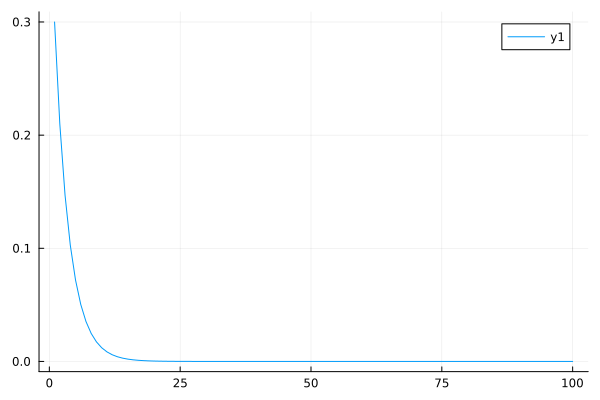

In [26]:
using Plots
using Statistics
beta = 0.3
T = 1:100
probs = [(1 - beta)^(t - 1) * beta for t in T]

mu = sum([p * t for (p, t) in zip(probs, T)])
sig2 = sum([(t - mu)^2 * p for (p, t) in zip(probs, T)])
println("Distribution of infection time for β = " * string(beta))
println("variance σ^2: " * string(sig2))
println("Mean μ: " * string(mu))

plot(T, probs)

# Localization algorithms (Pearson, LPTVA, GMLA)

In [1]:
using Revise
includet("ObserverGraph.jl")
includet("Propagation.jl")
includet("Localization.jl")
includet("Visuals.jl")

In [15]:
using .ObserverGraph
using .Propagation

N = 20
n0 = 2
k = 1
frac_observers = 0.3
beta = 0.9

og::ObsGraph = make_BA_obs_graph(N, n0, k, frac_observers)
loc_data::LocData = propagate_SI!(og, beta);

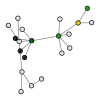

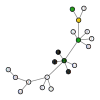

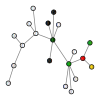

True source is 5

Performing Pearson Localization
Predicted source is 5

Performing LPTVA Localization
Predicted source is 5 

Performing GMLA localization
Considering 16
Considering 5
Considering 11
Predicted source is 11


In [16]:
using .Localization
using .Visuals

println("True source is $(loc_data.source)\n")

println("Performing Pearson Localization")
source_pred = pearson_loc(og, loc_data.obs_data)
println("Predicted source is $source_pred\n")
display(show_obs_graph(og, loc_data, should_label_idx=true, source_pred=source_pred))

println("Performing LPTVA Localization")
source_pred = LPTVA_loc(og, loc_data.obs_data, beta)
println("Predicted source is $source_pred \n")
display(show_obs_graph(og, loc_data, should_label_idx=true, source_pred=source_pred))

println("Performing GMLA localization")
source_pred = GMLA_loc(og, loc_data.obs_data, beta)
println("Predicted source is $source_pred")
display(show_obs_graph(og, loc_data, should_label_idx=true, source_pred=source_pred))